In [1]:
# === Análise Descritiva do Conjunto de Dados MNIST ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# === Passo 1: Carregar os dados ===
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# === Passo 2: Converter para formato tabular (flatten) ===
num_imagens, altura, largura = X_treino.shape
X_treino_flat = X_treino.reshape(num_imagens, altura * largura)
df_mnist = pd.DataFrame(X_treino_flat)
df_mnist["label"] = y_treino

In [4]:
# === Passo 3: Estatísticas básicas ===
print("=== Estatísticas Gerais ===")
print(f"Total de imagens: {len(df_mnist)}")
print(f"Dimensão de cada imagem: {altura}x{largura}")
print("\nDistribuição dos dígitos (rótulos):")
print(df_mnist['label'].value_counts().sort_index())

=== Estatísticas Gerais ===
Total de imagens: 60000
Dimensão de cada imagem: 28x28

Distribuição dos dígitos (rótulos):
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


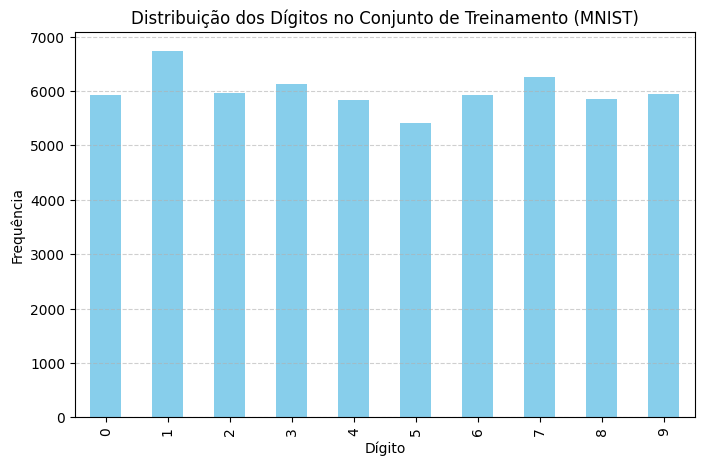

In [14]:
# === Passo 4: Gráfico de distribuição dos dígitos ===
plt.figure(figsize=(8, 5))
df_mnist['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribuição dos Dígitos no Conjunto de Treinamento (MNIST)")
plt.xlabel("Dígito")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [6]:
# === Passo 5: Estatísticas dos pixels ===
pixels = df_mnist.drop(columns=['label'])

print("\n=== Estatísticas dos valores de pixel ===")
print(pixels.describe())


=== Estatísticas dos valores de pixel ===
           0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std  

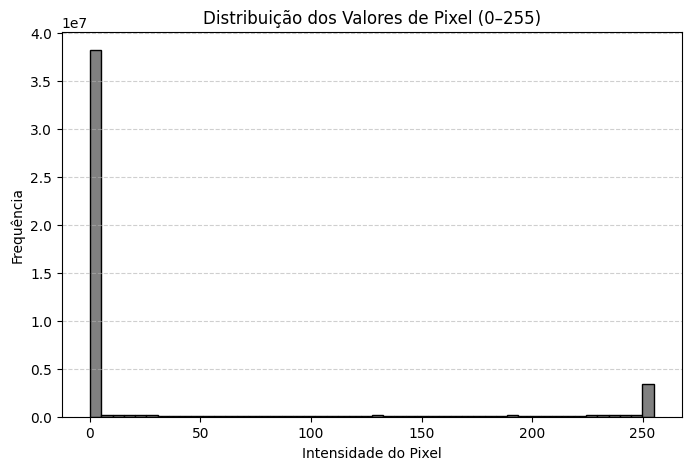

In [7]:
# === Passo 6: Histograma dos valores de pixel ===
plt.figure(figsize=(8, 5))
pixels.values.flatten()
plt.hist(pixels.values.flatten(), bins=50, color='gray', edgecolor='black')
plt.title("Distribuição dos Valores de Pixel (0–255)")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

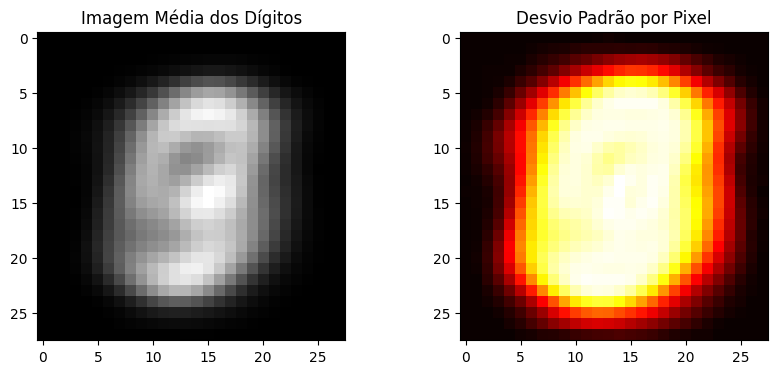

In [8]:
# === Passo 7: Média e desvio padrão por pixel (imagem média) ===
imagem_media = np.mean(X_treino, axis=0)
imagem_desvio = np.std(X_treino, axis=0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagem_media, cmap='gray')
plt.title("Imagem Média dos Dígitos")

plt.subplot(1, 2, 2)
plt.imshow(imagem_desvio, cmap='hot')
plt.title("Desvio Padrão por Pixel")
plt.show()

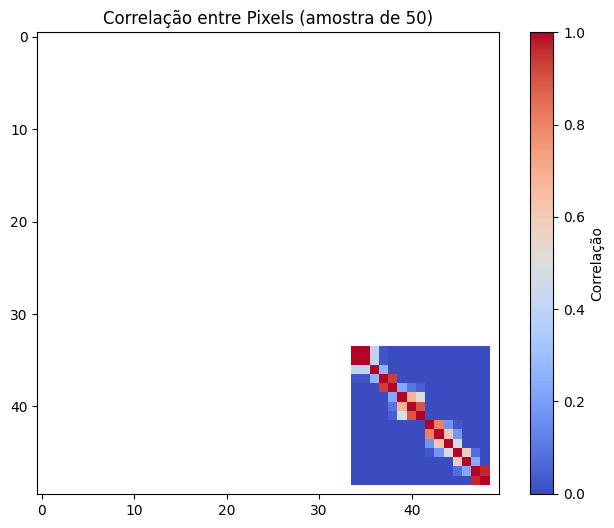

In [9]:
# === Passo 8: Correlação entre alguns pixels ===
amostra_corr = df_mnist.sample(5000, random_state=42)  # amostra pequena para desempenho
corr_matrix = amostra_corr.iloc[:, :50].corr()  # correlação entre 50 primeiros pixels

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlação entre Pixels (amostra de 50)")
plt.colorbar(label="Correlação")
plt.show()

In [10]:
# === Passo 9: Resumo estatístico dos rótulos ===
resumo_labels = df_mnist.groupby('label').mean()
print("\nMédia dos valores de pixel por dígito:")
print(resumo_labels.head())


Média dos valores de pixel por dígito:
       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
label                                                    ...                  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
label                                     
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]


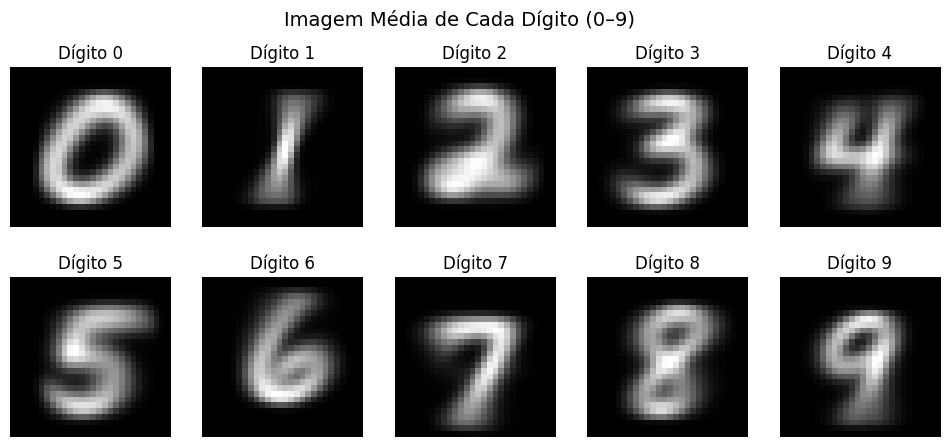

In [11]:
# === Passo 10: Visualização média dos dígitos ===
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(resumo_labels.loc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Dígito {i}")
    plt.axis('off')
plt.suptitle("Imagem Média de Cada Dígito (0–9)", fontsize=14)
plt.show()